In [1]:
import numpy as np
import pandas as pd
from random import seed
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

Question 1

In [2]:
mu, sigma, N = 0, 1, 1000000
x = np.random.normal(mu, sigma, N)
e = np.random.normal(mu, sigma, N)

In [3]:
t = [i + 1 for i in range(N)]

In [4]:
a,b = 2,1
y = a*x+b+e
data = pd.DataFrame({'x':x,'y':y,'t':t})
data['DataNum']=np.ceil(data['t']/1000)

In [5]:
data

,x,y,t,DataNum
0,-2.031419,-3.060153,1,1.0
1,1.990418,2.962924,2,1.0
2,-0.184878,2.411078,3,1.0
3,-0.436836,0.401207,4,1.0
4,0.579963,3.310620,5,1.0
...,...,...,...,...
999995,-0.924371,0.303145,999996,1000.0
999996,0.929230,2.393717,999997,1000.0
999997,-1.544442,-3.532973,999998,1000.0
999998,0.211139,1.672473,999999,1000.0


In [6]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [7]:
reg = LinearRegression()

In [8]:
reg.fit(data['x'].values.reshape(-1,1),data['y'].values.reshape(-1,1))

LinearRegression()

In [9]:
# biais
a_biais=[]
b_biais=[]
Sim_biais=[]

In [10]:
for i in set(data['DataNum']):
    inputs = data[data['DataNum']==i]
    reg.fit(inputs['x'].values.reshape(-1,1),inputs['y'].values.reshape(-1,1))
    a_biais.append(reg.coef_[0][0])
    b_biais.append(reg.intercept_[0])
    Sim_biais.append(i)

In [11]:
result_dict = {'a_biais':a_biais,'b_biais':b_biais,'Sim_biais':Sim_biais}

In [12]:
result_biais=pd.DataFrame(result_dict)
result_biais

,a_biais,b_biais,Sim_biais
0,1.990071,1.018883,1.0
1,1.976361,0.972919,2.0
2,1.955975,1.047986,3.0
3,1.947859,1.048737,4.0
4,2.014419,0.942409,5.0
...,...,...,...
995,2.004127,1.015044,996.0
996,1.983148,1.048660,997.0
997,2.012827,1.007549,998.0
998,1.994037,1.005226,999.0


In [13]:
result_biais.describe()

,a_biais,b_biais,Sim_biais
count,1000.000000,1000.000000,1000.000000
mean,1.998980,1.001505,500.500000
std,0.032544,0.031760,288.819436
min,1.898784,0.898365,1.000000
25%,1.976352,0.979129,250.750000
50%,1.999258,1.002117,500.500000
75%,2.020746,1.023942,750.250000
max,2.098353,1.100340,1000.000000


In [14]:
### Estimateur sans biais
np.mean(result_biais['a_biais']) , np.mean(result_biais['b_biais'])

(1.9989796583522284, 1.0015047714824)

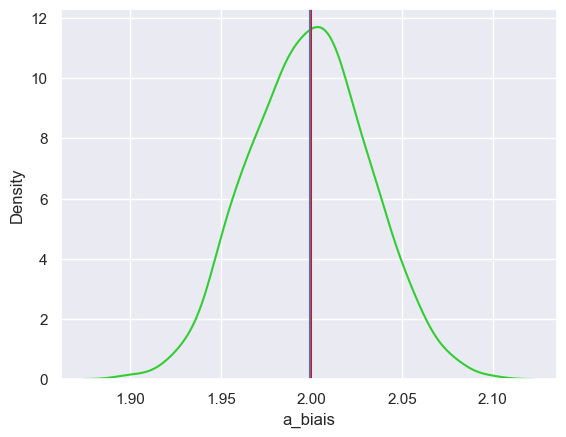

In [15]:
dens = sns.kdeplot(result_biais['a_biais'], color = "limegreen")
dens.axvline(x = 2, color = "red")
dens.axvline(x = np.mean(result_biais['a_biais']))

In [16]:
# consistent
a_cons=[]
b_cons=[]
Sim_cons=[]

In [17]:
n = [(1+i)*25  for i in range(1000)]

In [18]:
for i in n:
    inputs = data[data['t']<=i]
    reg.fit(inputs['x'].values.reshape(-1,1),inputs['y'].values.reshape(-1,1))
    a_cons.append(reg.coef_[0][0])
    b_cons.append(reg.intercept_[0])
    Sim_cons.append(i)

In [19]:
result_dict_cons = {'a_cons':a_cons,'b_cons':b_cons,'Sim_cons':Sim_cons}

In [20]:
result_cons=pd.DataFrame(result_dict_cons)
result_cons

,a_cons,b_cons,Sim_cons
0,1.875986,1.087233,25
1,1.878379,1.079673,50
2,1.967204,1.039860,75
3,1.958517,1.046786,100
4,1.980035,1.042332,125
...,...,...,...
995,2.004650,1.002716,24900
996,2.004437,1.002657,24925
997,2.004069,1.002806,24950
998,2.003975,1.002905,24975


<Axes: xlabel='Sim_cons', ylabel='a_cons'>

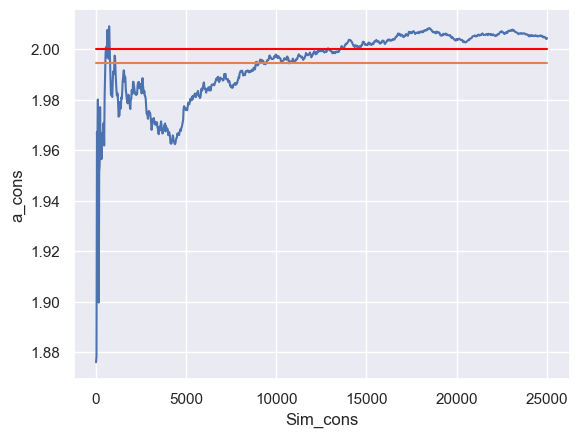

In [21]:
# Estimateur consistant
sns.lineplot(data=result_cons, x="Sim_cons", y="a_cons")
sns.lineplot(data=result_cons, x="Sim_cons", y=2, color = "red")
sns.lineplot(data=result_cons, x="Sim_cons", y=np.mean(a_cons))

Question 2

In [22]:
data.head(5)

,x,y,t,DataNum
0,-2.031419,-3.060153,1,1.0
1,1.990418,2.962924,2,1.0
2,-0.184878,2.411078,3,1.0
3,-0.436836,0.401207,4,1.0
4,0.579963,3.310620,5,1.0


In [23]:
mu = np.random.normal(mu, sigma, N)
w = x + mu
data['y'] = a*x+b+w+e
#data = pd.DataFrame({'x':x,'y':y,'t':t})
#data['DataNum']=np.ceil(data['t']/1000)

In [24]:
data.head(5)

,x,y,t,DataNum
0,-2.031419,-6.124549,1,1.0
1,1.990418,3.622506,2,1.0
2,-0.184878,3.309076,3,1.0
3,-0.436836,1.257427,4,1.0
4,0.579963,3.996203,5,1.0


In [25]:
reg.fit(data['x'].values.reshape(-1,1),data['y'].values.reshape(-1,1))

LinearRegression()

In [26]:
# biais
a_biais=[]
b_biais=[]
Sim_biais=[]

In [27]:
for i in set(data['DataNum']):
    inputs = data[data['DataNum']==i]
    reg.fit(inputs['x'].values.reshape(-1,1),inputs['y'].values.reshape(-1,1))
    a_biais.append(reg.coef_[0][0])
    b_biais.append(reg.intercept_[0])
    Sim_biais.append(i)

In [28]:
result_dict = {'a_biais':a_biais,'b_biais':b_biais,'Sim_biais':Sim_biais}

In [29]:
result_biais=pd.DataFrame(result_dict)
result_biais

,a_biais,b_biais,Sim_biais
0,2.969347,1.040924,1.0
1,2.969036,0.994299,2.0
2,2.989094,0.990378,3.0
3,2.997982,1.031147,4.0
4,3.030509,0.944487,5.0
...,...,...,...
995,3.039147,0.999586,996.0
996,2.926501,1.055191,997.0
997,3.049599,0.989531,998.0
998,2.966902,1.008113,999.0


In [30]:
result_biais.describe()

,a_biais,b_biais,Sim_biais
count,1000.000000,1000.000000,1000.000000
mean,3.000865,1.001016,500.500000
std,0.045499,0.045939,288.819436
min,2.862369,0.871808,1.000000
25%,2.967450,0.968866,250.750000
50%,3.000475,1.000476,500.500000
75%,3.031739,1.034256,750.250000
max,3.164342,1.133574,1000.000000


In [31]:
### Estimateur biaisé
np.mean(result_biais['a_biais']) , np.mean(result_biais['b_biais'])

(3.0008649100553892, 1.0010160685944065)

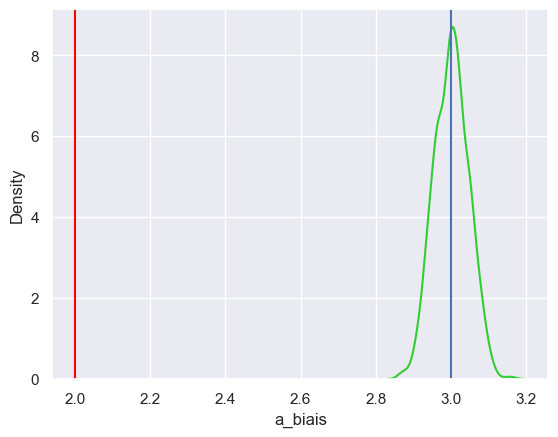

In [32]:
dens = sns.kdeplot(result_biais['a_biais'], color = "limegreen")
dens.axvline(x = 2, color = "red")
dens.axvline(x = np.mean(result_biais['a_biais']))


In [33]:
# consistent
a_cons=[]
b_cons=[]
Sim_cons=[]

In [34]:
n = [(1+i)*25  for i in range(1000)]

In [35]:
for i in n:
    inputs = data[data['t']<=i]
    reg.fit(inputs['x'].values.reshape(-1,1),inputs['y'].values.reshape(-1,1))
    a_cons.append(reg.coef_[0][0])
    b_cons.append(reg.intercept_[0])
    Sim_cons.append(i)

In [36]:
result_dict_cons = {'a_cons':a_cons,'b_cons':b_cons,'Sim_cons':Sim_cons}

In [37]:
result_cons=pd.DataFrame(result_dict_cons)
result_cons

,a_cons,b_cons,Sim_cons
0,3.060746,1.384167,25
1,2.961987,1.169239,50
2,2.801642,1.128610,75
3,2.848062,1.182922,100
4,2.951928,1.141067,125
...,...,...,...
995,3.003327,1.003994,24900
996,3.002817,1.004062,24925
997,3.002517,1.004142,24950
998,3.002477,1.004193,24975


<Axes: xlabel='Sim_cons', ylabel='a_cons'>

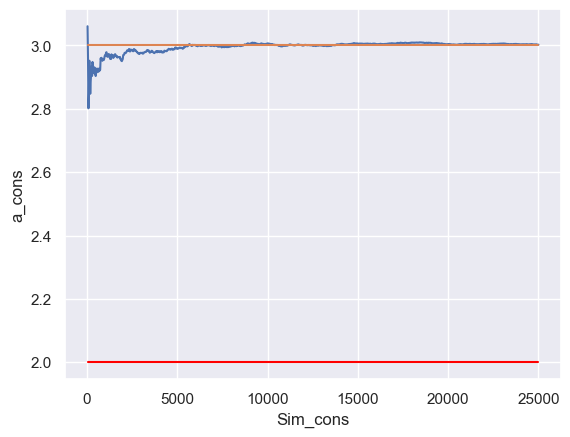

In [38]:
# Estimateur non consistant
sns.lineplot(data=result_cons, x="Sim_cons", y="a_cons")
sns.lineplot(data=result_cons, x="Sim_cons", y=2, color = "red")
sns.lineplot(data=result_cons, x="Sim_cons", y=np.mean(a_biais))
